In [1]:
#IMPORT PACKAGE
import numpy as np # linear algebra
import pandas as pd # data processing,

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
#DEFINE PATH
spam=pd.read_csv(r'C:\Users\AKANSHA MISHRA\Downloads\SmsSpam.csv',encoding='latin-1')

In [4]:
print(spam)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [5]:
#REMOVE UNWANTED COLUMNS SO THAT SPACE AND TIME COMPLEXITY MAY REDUCE AND MAKE A EFFECTIVE ALGORITHM
spam=spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
spam



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#RENAME TWO DATA IN A DATASET AS X AND Y IT WILL BE HELPFUL IN GRAPH PLOTTING AS TWO QUADRANT
X=spam['v2']
Y=spam['v1']

In [8]:
from scipy import stats
import numpy as np

In [9]:
#DEFINE SPAM AS 1 AND HAM AS 0 ENCODED SO THAT MODEL CAN READ EASILY AS OUR MODEL UNDERSTAND ONLY BINARY
spam['v1'] = spam['v1'].map({
    'ham' : 0,
    'spam' : 1
    })

In [10]:
spam



,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
def clean_text(Message):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', text)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return text

In [12]:
#TAKEN 25% AS TESTING AND 75% AS TRAINING TO GET MODEL
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [13]:


#from vectorization as input cannot be taken as string thats why vector type input 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)



In [14]:
#predict model
def prediction(X_test, model_object):
  
    # Predicton on test with giniIndex
    Y_pred = model_object.predict(Xv_test)
    print("Predicted values:")
    print(Y_pred)
    return Y_pred

In [15]:


#check accuracy how much similarities between actual and predict model AND WITH THAT DRAW CONFUSION MATRIX
def cal_accuracy(Y_test, Y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(Y_test, Y_pred))
      
    print ("Accuracy : ",
    accuracy_score(Y_test,Y_pred)*100)



In [16]:
 #Decision tree with gini
model_gini = DecisionTreeClassifier(criterion = "gini",random_state = 123,max_depth=10, min_samples_leaf=6)
  
# Performing training
model_gini.fit(Xv_train, Y_train)

# Prediction using gini
Y_pred_gini = prediction(Xv_test, model_gini)
cal_accuracy(Y_test, Y_pred_gini)

Predicted values:
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Confusion Matrix:  [[1193    8]
 [  58  134]]
Accuracy :  95.26202440775306


In [17]:


# Decision tree with entropy
model_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 123, max_depth = 10, min_samples_leaf = 6)
  
# Performing training
model_entropy.fit(Xv_train, Y_train)

# Prediction using entropy
Y_pred_entropy = prediction(Xv_test, model_entropy)
cal_accuracy(Y_test, Y_pred_entropy)



Predicted values:
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
Confusion Matrix:  [[1193    8]
 [  47  145]]
Accuracy :  96.05168700646087


<AxesSubplot:ylabel='Frequency'>

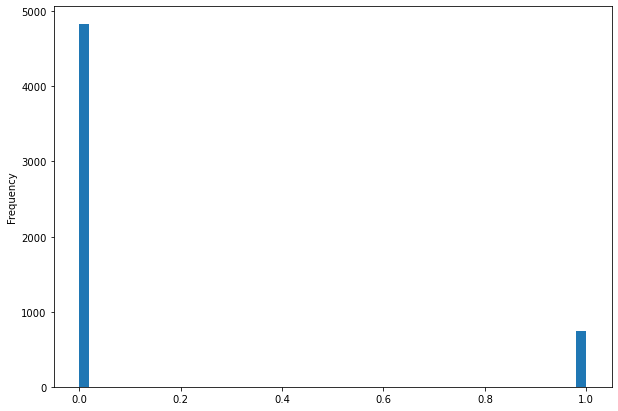

In [18]:
#EDA(Exploratory data analysis)
import matplotlib.pyplot as plt
import seaborn as sns
#draw histogram that how many spam and how many ham message are there
spam['v1'].plot(bins=50, kind='hist',figsize=(10,7))



([<matplotlib.patches.Wedge at 0x2649e538e20>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

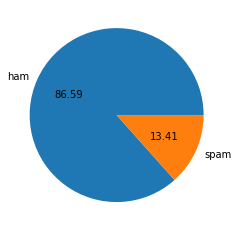

In [19]:


plt.pie(spam['v1'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

